# U1 L3 P3 Drill: Present the same data multiple ways

In [1]:
import pandas as pd
import datetime
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="ticks", font_scale=1.2)

### Choose one variable and plot that variable four different ways.

In [3]:
# Create Pandas DataFrame from CSV file containing data about Mumps, Measles, and other
# diseases in the United States. The data set includes observations from Alaska and
# California, for the period between 1054 to 2001:
df = pd.read_csv('ak_ca.csv')

# Convert date column from integer to datetime and sort values:
df.date = df.date.apply(
    lambda d: pd.to_datetime(str(d) + '-0', format="%Y%W-%w")
    )
df = df.sort_values(by=['date'])

# Set datetime column as index and change index name:
df = df.set_index('date')

df.head(n=3)

,state,disease,incidence_per_100000
date,,,
1916-01-09,CA,DIPHTHERIA,3.49
1916-01-09,CA,DIPHTHERIA,1.69
1916-01-09,CA,DIPHTHERIA,6.16


In [4]:
# Filter rows for Mumps disease in Alaska:
mumps_ak = df[(df['disease'] == 'MUMPS') & (df['state'] == 'AK')]

# Create a dataframe with average cases of Mumps per year for the entire period:
mumps_ak_y = mumps_ak.groupby(mumps_ak.index.year).mean()
mumps_ak_y = mumps_ak_y.reset_index()

# Create a dataframe with average cases of Mumps per month for the entire period:
mumps_ak_m = mumps_ak.groupby(mumps_ak.index.month).mean()

# Reset the index so that later I can plot the incidence of Mumps per week for the 
# entire period:
mumps_ak_w = mumps_ak.reset_index()

# Create a dataframe grouping the monthly incidence of Mumps, for every year:
mumps_ak_ym = mumps_ak.groupby([(mumps_ak.index.year),(mumps_ak.index.month)]).mean()
mumps_ak_ym.index.names = ['year','month']
mumps_ak_ym.reset_index(level=['month','year'], inplace=True)
mumps_ak_ym['disease'] = 'MUMPS'

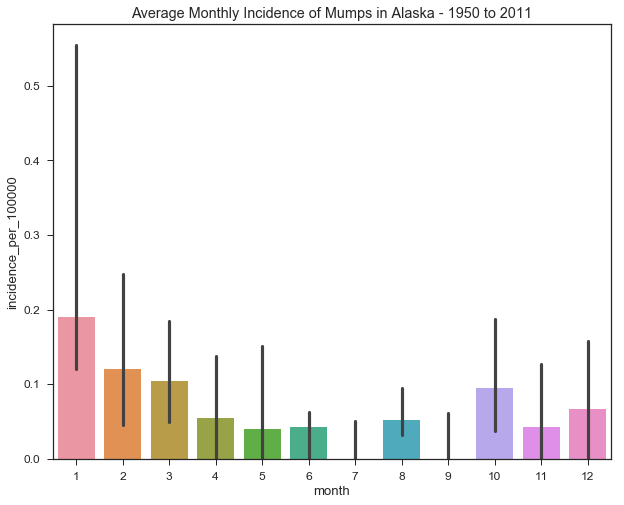

In [5]:
# Plot the average monthly incidence of mumps (candle chart)
plt.figure(figsize=(10,8))
ax = sns.barplot(x="month", y="incidence_per_100000", data=mumps_ak_ym, estimator=median)
plt.title('Average Monthly Incidence of Mumps in Alaska - 1950 to 2011')
plt.show()

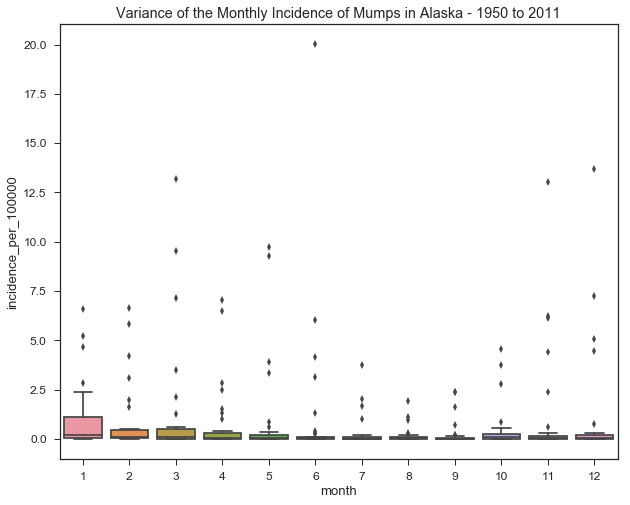

In [6]:
# Plot the variance of the monthly incidence of Mumps:
plt.figure(figsize=(10,8))
ym_variance = sns.boxplot(data=mumps_ak_ym, x='month', y='incidence_per_100000')
plt.title('Variance of the Monthly Incidence of Mumps in Alaska - 1950 to 2011')
plt.show()

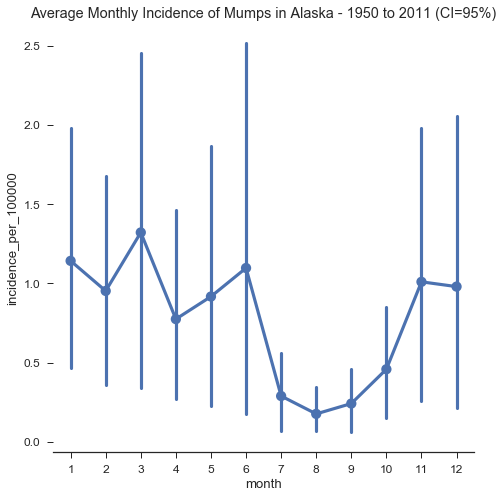

In [7]:
# Plot the average monthly incidence of mumps with 95% Confidence Interval (factorplot):
g = sns.factorplot(data=mumps_ak_ym, x='month', y='incidence_per_100000', ci=95,size=7)
g.despine(left=True)
g.set_ylabels("incidence_per_100000")
g.set_xlabels("month")
plt.title('Average Monthly Incidence of Mumps in Alaska - 1950 to 2011 (CI=95%)')
plt.show()

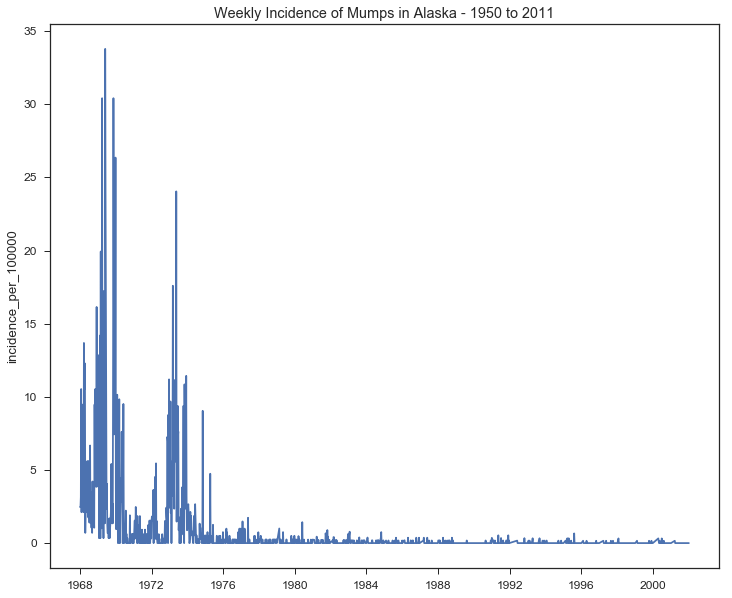

In [8]:
# Plot the weekly incidence of Mumps for the entire period:
plt.figure(figsize=(12,10))
plt.plot(mumps_ak_w['date'],mumps_ak_w['incidence_per_100000'])
plt.title('Weekly Incidence of Mumps in Alaska - 1950 to 2011')
plt.ylabel('incidence_per_100000')
plt.show()

### Choose two continuous variables, and plot them three different ways.

In [9]:
# Filter rows for Measles disease in Alaska:
measles_ak = df[(df['disease'] == 'MEASLES') & (df['state'] == 'AK')]

# Create a dataframe with average cases of measles per year for the entire period:
measles_ak_y = measles_ak.groupby(measles_ak.index.year).mean()
measles_ak_y = measles_ak_y.reset_index()

# Create a dataframe with average cases of measles per month for the entire period:
measles_ak_m = measles_ak.groupby(measles_ak.index.month).mean()

# Reset the index so that later I can plot the incidence of measles per week for the 
# entire period:
measles_ak_w = measles_ak.reset_index()

# Create a dataframe grouping the monthly incidence of measles, for every year:
measles_ak_ym = measles_ak.groupby([(measles_ak.index.year),(measles_ak.index.month)]).mean()
measles_ak_ym.index.names = ['year','month']
measles_ak_ym.reset_index(level=['month','year'], inplace=True)
measles_ak_ym['disease'] = 'MEASLES'

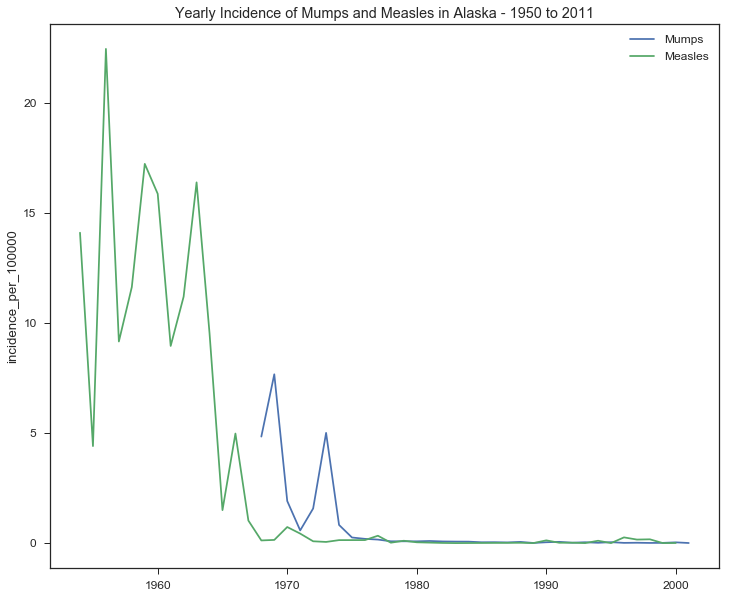

In [10]:
# Plot the yearly incidence of Mumps and Measles for the entire period:
plt.figure(figsize=(12,10))
mumps = plt.plot(mumps_ak_y['date'],mumps_ak_y['incidence_per_100000'], label='Mumps')
measles = plt.plot(measles_ak_y['date'],measles_ak_y['incidence_per_100000'], label='Measles')
plt.title('Yearly Incidence of Mumps and Measles in Alaska - 1950 to 2011')
plt.ylabel('incidence_per_100000')
plt.legend()
plt.show()

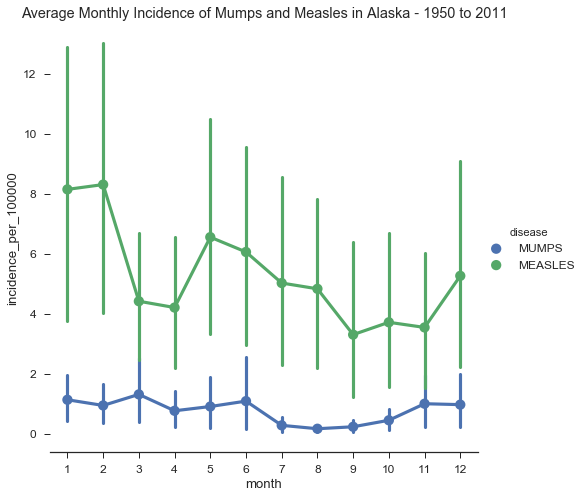

In [11]:
# Create a dataframe with measles and mumps data:
mm_ak_ym = mumps_ak_ym.append(measles_ak_ym)

# Plot the average monthly incidence of measles with 95% Confidence Interval (factorplot):
g = sns.factorplot(data=mm_ak_ym, x='month', y='incidence_per_100000', hue='disease', ci=95,size=7)
g.despine(left=True)
g.set_ylabels("incidence_per_100000")
g.set_xlabels("month")
plt.title('Average Monthly Incidence of Mumps and Measles in Alaska - 1950 to 2011')
plt.show()

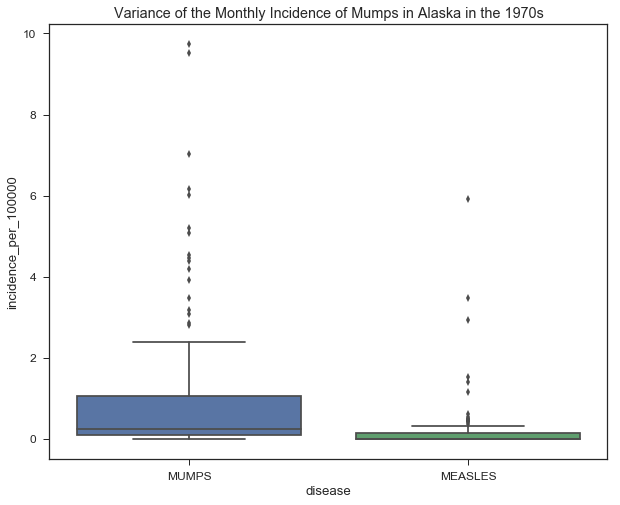

In [12]:
# Filter the Mumps and Measles dataframe for data from the 1970s:
mm_70s = mm_ak_ym[(mm_ak_ym['year'] >= 1970) & (mm_ak_ym['year'] < 1980)]

# Plot the variance of the monthly incidence of Mumps:
plt.figure(figsize=(10,8))
mm_variance = sns.boxplot(data=mm_70s, x='disease', y='incidence_per_100000')
plt.title('Variance of the Monthly Incidence of Mumps in Alaska in the 1970s')
plt.show()

### Choose one continuous variable and one categorical variable, and plot them six different ways.

In [13]:
measles_ca = df[(df['disease'] == 'MEASLES') & (df['state'] == 'CA')]
measles_ca_ym = measles_ca.groupby(
    [(measles_ca.index.year),(measles_ca.index.month)]).mean()
measles_ca_ym.index.names = ['year','month']
measles_ca_ym.reset_index(level=['month','year'], inplace=True)
measles_ca_ym['disease'] = 'MEASLES'
measles_ca_ym['state'] = 'CA'
measles_ak_ym['state'] = 'AK'

measles_ca_ak = measles_ca_ym.append(measles_ak_ym)

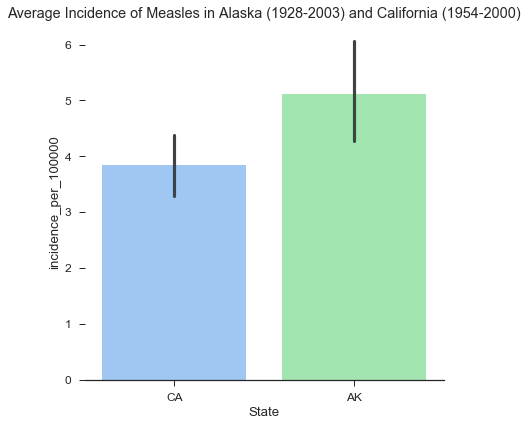

In [14]:
# Plot the average monthly incidence of mumps in AK and CA
# with 95% Confidence Interval (factorplot):
g = sns.factorplot(x="state", y="incidence_per_100000", data=measles_ca_ak,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("incidence_per_100000")
g.set_xlabels("State")
plt.title('Average Incidence of Measles in Alaska (1928-2003) and California (1954-2000)')
plt.show()

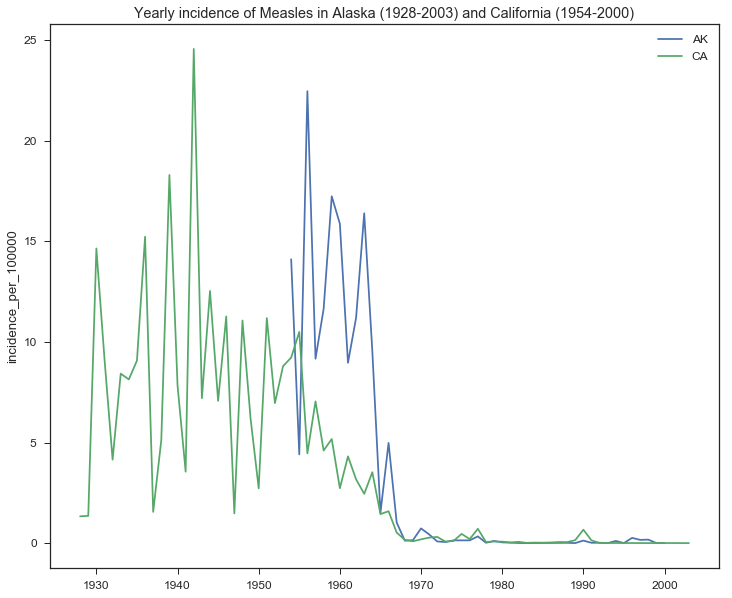

In [15]:
measles_ca_y = measles_ca.groupby(measles_ca.index.year).mean()
measles_ca_y = measles_ca_y.reset_index()

# Plot the yearly incidence of Measles in AK and CA for the entire period:
plt.figure(figsize=(12,10))
ak = plt.plot(measles_ak_y['date'],measles_ak_y['incidence_per_100000'],label='AK')
ca = plt.plot(measles_ca_y['date'],measles_ca_y['incidence_per_100000'],label='CA')
plt.title('Yearly incidence of Measles in Alaska (1928-2003) and California (1954-2000)')
plt.ylabel('incidence_per_100000')
plt.legend()
plt.show()

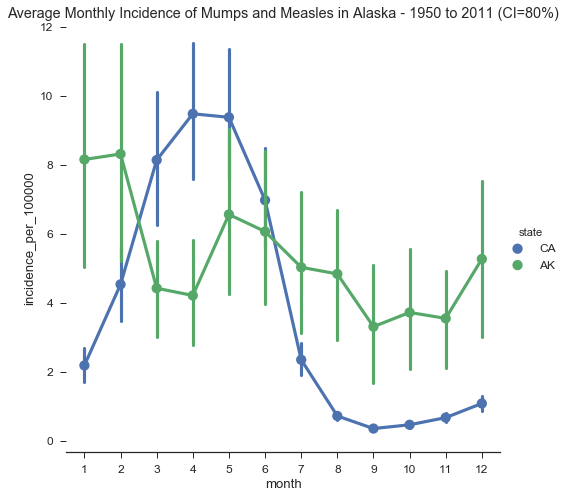

In [17]:
# Plot the average monthly incidence of measles with 80% Confidence Interval (factorplot):
g = sns.factorplot(data=measles_ca_ak, x='month', y='incidence_per_100000', hue='state', ci=80,size=7)
g.despine(left=True)
g.set_ylabels("incidence_per_100000")
g.set_xlabels("month")
plt.title('Average Monthly Incidence of Mumps and Measles in Alaska - 1950 to 2011 (CI=80%)')
plt.show()

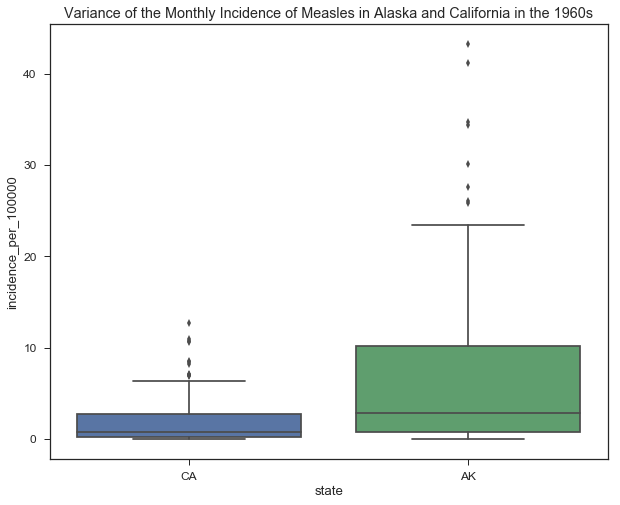

In [18]:
# Filter the Mumps and Measles dataframe for data from the 1960s:
m_60s = measles_ca_ak[(measles_ca_ak['year'] >= 1960) & (measles_ca_ak['year'] < 1970)]

# Plot the variance of the monthly incidence of Mumps:
plt.figure(figsize=(10,8))
mm_variance = sns.boxplot(data=m_60s, x='state', y='incidence_per_100000')
plt.title('Variance of the Monthly Incidence of Measles in Alaska and California in the 1960s')
plt.show()

In [19]:
# Create a dataframe with Measles incidence columns for AK and CA:
df_60s = measles_ak.loc['1960-01-01':'1969-12-31']
df_60s = df_60s.drop(['state'], axis=1)
df_60s.rename(columns={'incidence_per_100000':'AK'}, inplace=True)
df_60s['CA'] = measles_ca.loc['1960-01-01':'1969-12-31']['incidence_per_100000']

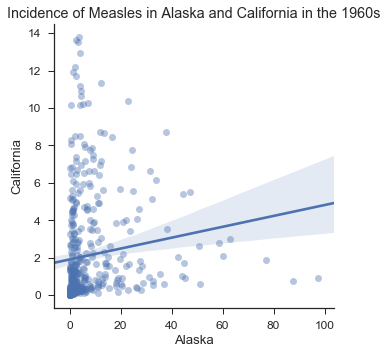

In [20]:
g = sns.lmplot(y='CA', # Variable 1.
               x='AK', # Variable 2.
               data=df_60s, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("California")
g.set_xlabels("Alaska")
plt.title('Incidence of Measles in Alaska and California in the 1960s')
plt.show()

### As an optional challenge:
Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups.

Accompany your plot with a written description of what you see.

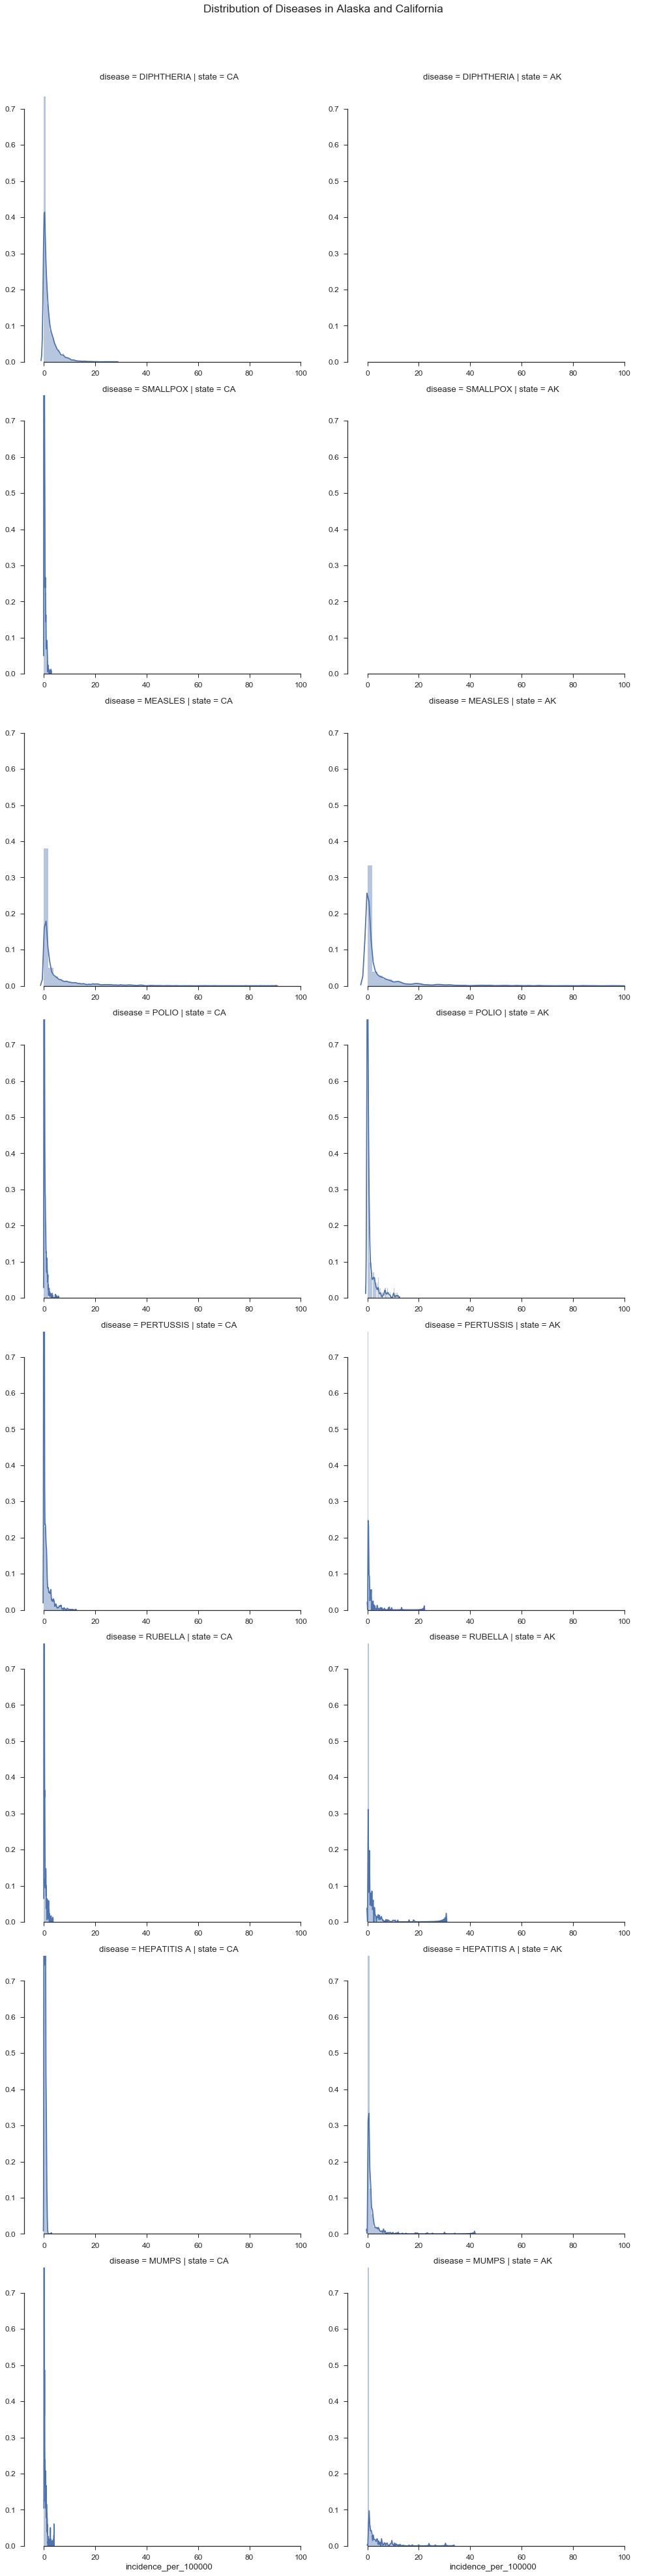

In [21]:
g = sns.FacetGrid(df, row="disease", col="state", size=7)
g.map(sns.distplot, "incidence_per_100000")
plt.subplots_adjust(top=0.95)
g.set_axis_labels('US States')
g.set_xlabels("incidence_per_100000")
plt.suptitle('Distribution of Diseases in Alaska and California')
sns.despine(trim=True)
plt.show()

For both states, the distribution of incidences are by far the most common at zero (or near zero) for all diseases. 

The relationships between the variables (CA and AK) are more noteworthy. Generally, incidence of diseases were higher in Alaska than in California. Measles, for instance, infected approximately 100 persons per 100k in Alaska, and 90/100k in California. Hepatitis hit approximately 35/100k in Alaska, while only less than 5/100k in California during the period of observation.

The exceptions are Diphteria and Smallpox, both with higher incidence in California than in Alaska.